# Introduction

In the project, I decided to choose TMDb movies dataset. The dataset is collected from TMDb API and contains various information about 10,000 movies including many features such as cast members, genre of the movie, budget, revenue and more features. 



### Here are the questions were came into my mind.


- ##### 1. What is The Most Rated Movie per Year

- ##### 2. Top Five Most Popular Directors Based On Movie Rating Count

- ##### 3. Top Movies for Christopher Nolan and Quentin Tarantino

- ##### 4. The longest movie in terms of runtime

- ##### 5. What production companies that people watch their movies the most.

- ##### 6. What kind of movies that the most production company produce?

- ##### 7. Most Favorable/Loved Movie Genre

- ##### 8. Do Movie Budget Increase Among The Years?


## Import Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import os
%matplotlib inline

#### Some utility functions I created to help me during the project.

In [2]:
def create_directory(directory_name):
    """
    A functions that creates a directory in the current directory 
    returns the relative path.
    """
    try:
        # Create directory inside the current directory...
        os.mkdir(directory_name)
        print(f"Directory <{directory_name}> Created.")
        return directory_name
    
    except FileExistsError:
        print(f"Directory <{directory_name}> already exists.")
        return directory_name

In [3]:
def download_file(directory, url):
    data = requests.get(url)
    file_path = os.path.join(directory, url.split('/')[-1])
    with open(file_path, "wb") as file:
        file.write(data.content)
        print("File downloaded successfully.")
        return file_path

In [4]:
# this directory will store the dataset used.
datasets_directory = create_directory('datasets')
insights_directory = create_directory('insights')

Directory <datasets> already exists.
Directory <insights> already exists.


## Data Gathering

#### Chosen dataset is: IMDB Movie Dataset

In [5]:
url = r'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv'
file_path = download_file(datasets_directory, url)

File downloaded successfully.


In [6]:
# view all columns
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('./datasets/tmdb-movies.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


## Data Assessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Checking what columns contain missing values

In [9]:
df.isnull().sum().sort_values(ascending = False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
budget_adj                 0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

#### Checking duplicates

In [10]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### A Movie cannot have zero revenue.

In [11]:
df[df.revenue == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,gambling|bodyguard|remake,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,new year's eve|fire|showdown|terrorist|embassy,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.0


#### A Movie cannot have zero budget.

In [12]:
df[df.budget == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,london|detective|sherlock holmes,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",thriller|serial killer|psychic|fbi agent|intrigue,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,desert|hunting,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,monster|carry on|horror spoof,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


In [13]:
df.release_year.tail()

10861    1966
10862    1966
10863    1966
10864    1966
10865    1966
Name: release_year, dtype: int64

In [14]:
df.release_date.tail()

10861     6/15/66
10862    12/21/66
10863      1/1/66
10864     11/2/66
10865    11/15/66
Name: release_date, dtype: object

### Issues Found
- Duplicate Movie Record 'Tekken'.
- release_date column has issues where movies' release date is before 2000.
- Zero budget Movies. (A movie cannot have zero budgets)
- Zero Revenue Movies.
- Unnecessary Columns shall be dropped.
- Some columns need to be renamed.

# Data Wrangling

#### Creating a separate dataframe to apply cleaning on the new one.

In [15]:
cleansed_df = df.copy()

####  Removing Duplicates.

In [16]:
cleansed_df.drop_duplicates(inplace= True)

In [17]:
cleansed_df[cleansed_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [18]:
cleansed_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

####  Removing Zero-Budget Movies.

In [19]:
zero_budget_movies = cleansed_df[cleansed_df.budget == 0].index
zero_budget_movies

Int64Index([   30,    36,    72,    74,    75,    88,    92,    95,   100,
              101,
            ...
            10854, 10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863,
            10864],
           dtype='int64', length=5696)

In [20]:
cleansed_df.drop(zero_budget_movies, axis = 0, inplace = True)

####  Removing Zero-Revenue Movies.

In [21]:
zero_revenue_movies = cleansed_df[cleansed_df.revenue == 0].index
zero_revenue_movies

Int64Index([   48,    67,    93,   133,   145,   149,   154,   156,   159,
              165,
            ...
            10802, 10810, 10815, 10820, 10824, 10827, 10832, 10841, 10855,
            10865],
           dtype='int64', length=1315)

In [22]:
cleansed_df.drop(zero_revenue_movies, axis = 0, inplace = True)

In [23]:
cleansed_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,alcohol|adultery|professor|married couple|son,Mike Nicholsâ€™ film from Edward Albee's play ...,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,cold war|east germany,An American scientist publicly defects to East...,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,sheriff|ranch|liquor|settler|revolver,"Cole Thornton, a gunfighter for hire, joins fo...",120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,missionary|china|us navy|chinese|battle,Engineer Jake Holman arrives aboard the gunboa...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


In [24]:
cleansed_df[cleansed_df.budget == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [25]:
cleansed_df[cleansed_df.revenue == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [26]:
cleansed_df.reset_index(drop=True, inplace=True)

In [27]:
cleansed_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,alcohol|adultery|professor|married couple|son,Mike Nicholsâ€™ film from Edward Albee's play ...,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
3850,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,cold war|east germany,An American scientist publicly defects to East...,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
3851,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,sheriff|ranch|liquor|settler|revolver,"Cole Thornton, a gunfighter for hire, joins fo...",120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
3852,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,missionary|china|us navy|chinese|battle,Engineer Jake Holman arrives aboard the gunboa...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


In [28]:
cleansed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   imdb_id               3854 non-null   object 
 2   popularity            3854 non-null   float64
 3   budget                3854 non-null   int64  
 4   revenue               3854 non-null   int64  
 5   original_title        3854 non-null   object 
 6   cast                  3850 non-null   object 
 7   homepage              1426 non-null   object 
 8   director              3853 non-null   object 
 9   tagline               3574 non-null   object 
 10  keywords              3716 non-null   object 
 11  overview              3854 non-null   object 
 12  runtime               3854 non-null   int64  
 13  genres                3854 non-null   object 
 14  production_companies  3808 non-null   object 
 15  release_date         

#### Fixing Release Date Column

In [29]:
def clean_year_part(row):
    release_year = str(row.release_year)
    release_date = row.release_date
    return release_date[:-2] + str(release_year)

In [30]:
cleansed_df['release_date'] = cleansed_df.apply(clean_year_part, axis = 1)
cleansed_df['release_date'] = pd.to_datetime(cleansed_df['release_date'])

In [31]:
cleansed_df.release_date.tail()

3849   1966-06-21
3850   1966-07-13
3851   1966-12-17
3852   1966-12-20
3853   1966-08-24
Name: release_date, dtype: datetime64[ns]

In [32]:
cleansed_df.release_year.tail()

3849    1966
3850    1966
3851    1966
3852    1966
3853    1966
Name: release_year, dtype: int64

#### Dropping unnecessary columns, won't be used for my analyses

In [33]:
columns_to_drop = ['id', 'homepage', 'budget_adj', 'revenue_adj']
cleansed_df.drop(columns_to_drop, axis = 1, inplace = True)

#### Renaming columns' names to be consistent.

In [34]:
cleansed_df.rename(columns={'budget': 'movie_budget',
                                            'revenue': 'movie_revenue',
                                            'original_title': 'movie_name',
                                            'director': 'movie_director'}
                                          , inplace=True)

In [35]:
cleansed_df.columns

Index(['imdb_id', 'popularity', 'movie_budget', 'movie_revenue', 'movie_name',
       'cast', 'movie_director', 'tagline', 'keywords', 'overview', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

In [36]:
cleansed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_id               3854 non-null   object        
 1   popularity            3854 non-null   float64       
 2   movie_budget          3854 non-null   int64         
 3   movie_revenue         3854 non-null   int64         
 4   movie_name            3854 non-null   object        
 5   cast                  3850 non-null   object        
 6   movie_director        3853 non-null   object        
 7   tagline               3574 non-null   object        
 8   keywords              3716 non-null   object        
 9   overview              3854 non-null   object        
 10  runtime               3854 non-null   int64         
 11  genres                3854 non-null   object        
 12  production_companies  3808 non-null   object        
 13  release_date      

### Storing the cleansed dataset as {tmdb-movies-cleansed.csv}

In [37]:
savepath = os.path.join(datasets_directory, 'tmdb-movies-cleansed.csv')
cleansed_df.to_csv(savepath, index = False)

In [38]:
tmdb_movies = pd.read_csv("./datasets/tmdb-movies-cleansed.csv", parse_dates=["release_date"])
tmdb_movies

,imdb_id,popularity,movie_budget,movie_revenue,movie_name,cast,movie_director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,You are cordially invited to George and Martha...,alcohol|adultery|professor|married couple|son,Mike Nicholsâ€™ film from Edward Albee's play ...,131,Drama,Chenault Productions,1966-06-21,74,7.5,1966
3850,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,It tears you apart with suspense!,cold war|east germany,An American scientist publicly defects to East...,128,Mystery|Thriller,Universal Pictures,1966-07-13,46,6.3,1966
3851,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,It's the Big One with the Big Two,sheriff|ranch|liquor|settler|revolver,"Cole Thornton, a gunfighter for hire, joins fo...",120,Action|Western,Paramount Pictures|Laurel Productions,1966-12-17,36,6.9,1966
3852,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,This is the heroic story of the men on the U.S...,missionary|china|us navy|chinese|battle,Engineer Jake Holman arrives aboard the gunboa...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,1966-12-20,28,7.0,1966


## Exploratory Data Analysis

- ##### 1. What is The Most Rated Movie per Year

- ##### 2. Top Five Most Popular Directors Based On Movie Rating Count

- ##### 3. Top Movies for Christopher Nolan and Quentin Tarantino

- ##### 4. The longest movie in terms of runtime

- ##### 5. What production companies that people watch their movies the most.

- ##### 6. What kind of movies that the most production company produce?

- ##### 7. Most Favorable/Loved Movie Genre

- ##### 8. Do Movie Budget Increase Among The Years?

## Q: What is The Most Rated Movie per Year?

In [39]:
movies = tmdb_movies[["release_year", "movie_name", "vote_average"]]
movies.set_index(["release_year"], inplace= True)
movies.head()

,movie_name,vote_average
release_year,,
2015,Jurassic World,6.5
2015,Mad Max: Fury Road,7.1
2015,Insurgent,6.3
2015,Star Wars: The Force Awakens,7.5
2015,Furious 7,7.3


### A: We can se each year ratings are varied due to the culture change of people towads movie genres.

In [40]:
most_rated_movie_per_year = tmdb_movies.groupby("release_year")[["movie_name", "vote_average"]].agg(max)
most_rated_movie_per_year

,movie_name,vote_average
release_year,,
1960,The Magnificent Seven,8.0
1961,West Side Story,7.5
1962,To Kill a Mockingbird,7.7
1963,The Great Escape,7.5
1964,The Night of the Iguana,7.7
1965,Thunderball,7.2
1966,Who's Afraid of Virginia Woolf?,7.5
1967,You Only Live Twice,7.6
1968,Where Eagles Dare,7.7


## Top Five Most Popular Directors Based On Movie Rating Count
- Christopher Nolan is the most sucessful director.

In [41]:
tmdb_movies.groupby(['movie_director'])[['vote_count']].sum().sort_values(by=['vote_count'], ascending=False).head()

,vote_count
movie_director,
Christopher Nolan,41561
Steven Spielberg,36284
Peter Jackson,31696
Quentin Tarantino,27855
Ridley Scott,24508


## Q: Top Movies for Christopher Nolan and Quentin Tarantino

### A: Pulp Finction released in 1994 has an average rating of 8.1 and one of the most sucessful movies that tarantino directed.

In [42]:
tmdb_movies.loc[tmdb_movies.movie_director == "Quentin Tarantino", ["movie_name", "genres", "vote_average", "release_year"]].sort_values(by=["vote_average"], ascending = False).set_index("movie_name").head(3)

,genres,vote_average,release_year
movie_name,,,
Pulp Fiction,Thriller|Crime,8.1,1994
Reservoir Dogs,Crime|Thriller,7.9,1992
Inglourious Basterds,Drama|Action|Thriller|War,7.7,2009


### A: The dark knight released in 2008 has an average rating of 8.1 and one of the most sucessful movies that  directed. Also Interstellar in 2014 with rate of 8.0

In [43]:
tmdb_movies.loc[tmdb_movies.movie_director == "Christopher Nolan", ["movie_name", "genres", "vote_average", "release_year"]].sort_values(by=["vote_average"], ascending = False).set_index("movie_name").head(3)

,genres,vote_average,release_year
movie_name,,,
The Dark Knight,Drama|Action|Crime|Thriller,8.1,2008
Interstellar,Adventure|Drama|Science Fiction,8.0,2014
Inception,Action|Thriller|Science Fiction|Mystery|Adventure,7.9,2010


## Q: The longest movie in terms of runtime.

### A: Its name is Carlos a french-german movie released in 2010 with average rate 6.2. The movie is five hours long

In [44]:
tmdb_movies.loc[tmdb_movies.runtime == tmdb_movies.runtime.max(), ]

,imdb_id,popularity,movie_budget,movie_revenue,movie_name,cast,movie_director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
653,tt1321865,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,The man who hijacked the world,gun|car bomb|tv mini-series|terrorism|opec,"The story of Venezuelan revolutionary, Ilich R...",338,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,2010-05-19,35,6.2,2010


## Q: What production companies that people watch their movies the most.

### A: Marvel Studios and Walt Disney has the most engaging numbers of the dataset.

In [45]:
production_companies = tmdb_movies.groupby(['production_companies'])[['vote_count']].sum().sort_values(by=['vote_count'], ascending=False).head()
production_companies

,vote_count
production_companies,
Marvel Studios,42602
Walt Disney Pictures|Pixar Animation Studios,36397
Paramount Pictures,24389
Columbia Pictures,18481
DreamWorks Animation,16003


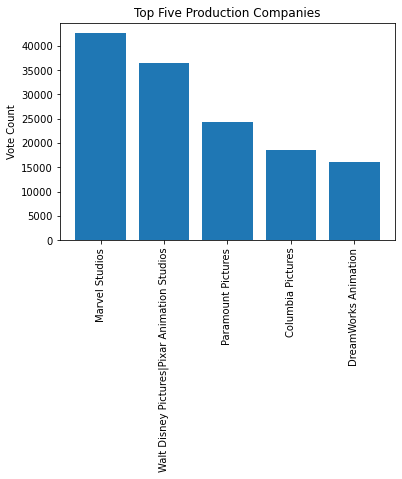

In [46]:
fig, ax = plt.subplots()
x = production_companies.index.tolist()
y = production_companies.vote_count
ax.bar(x, y)
ax.set_title("Top Five Production Companies")
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Vote Count")
plt.savefig(os.path.join(insights_directory, 'top-production-companies.png'), bbox_inches = "tight", pad_inches = 1)
plt.show()

## Q: What kind of movies that the most production company produce?

### A: Marvel Studios is a famous company where it produces super-hero movies. The following are the top rate movies.
- In the first place is Captain America: The Winter Soldier with average rate of 7.6
- In the second place is Iron Man with average rate of 7.3

In [47]:
tmdb_movies.loc[tmdb_movies.production_companies == "Marvel Studios", ["movie_name", "vote_average", "release_year"]].sort_values(by=["vote_average"], ascending = False).set_index("movie_name")

,vote_average,release_year
movie_name,,
Captain America: The Winter Soldier,7.6,2014
Iron Man,7.3,2008
The Avengers,7.3,2012
Ant-Man,7.0,2015
Iron Man 3,6.9,2013
Thor: The Dark World,6.8,2013
Iron Man 2,6.6,2010
Captain America: The First Avenger,6.5,2011


## Q: Most Favorable/Loved Movie Genre

### A: We can see that Comedy is the most popular genre that people love the most.

In [48]:
tmdb_movies.groupby(['genres'])[["popularity", "movie_revenue", "vote_count", "vote_average"]].sum().sort_values(by=['vote_count'], ascending=False).head()

,popularity,movie_revenue,vote_count,vote_average
genres,,,,
Comedy,229.520889,18343356514,81744,1373.9
Drama,209.633605,14274901536,78232,1611.8
Adventure|Fantasy|Action,56.751117,7597483556,41050,97.6
Action|Adventure|Science Fiction,53.987725,6419602018,32767,82.7
Comedy|Romance,100.430721,10806608583,31981,612.0


## Q: Do Movie Budget Increase Among The Years.

### A: Yes Movie budget is  increasing due to change in technology and tool used in produce movies.

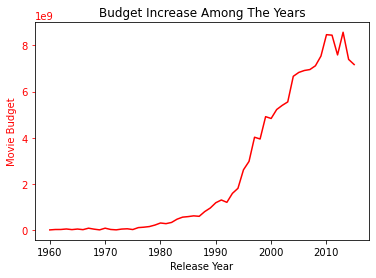

In [49]:
fig, axes = plt.subplots()
x = np.sort(tmdb_movies.release_year.unique())
y = tmdb_movies.groupby(tmdb_movies.release_year)["movie_budget"].sum().to_list()
axes.plot(x, y, color = 'r')
axes.set_title("Budget Increase Among The Years")
axes.set_xlabel("Release Year")
axes.set_ylabel("Movie Budget", color = 'r')
axes.tick_params('y', colors = 'r')
plt.savefig(os.path.join(insights_directory, 'Movie-budget.png'), bbox_inches = "tight", pad_inches = 1)

## Conclusion

The Movie Opinions can vary from person to person, people may watch movies based on genres such as comedy, action, etc.., maybe  people watch the movies based on the director and production companies as we saw, the most sucessful director based on people votes is Christopher Nolan. On the the hand, people watch super heroes and for that reason, the budget of producing movies increase among the years. What I can conclude, that super-hero movies will always be there due to its sucess.